<a href="https://colab.research.google.com/github/aditya7527/Music-Player-API/blob/main/SENTIMENTAL_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Install necessary libraries
!pip install nltk
!pip install wordcloud
!pip install textblob

In [3]:
# Import libraries
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
%matplotlib inline

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("milobele/sentiment140-dataset-1600000-tweets")

print("Path to dataset files:", path)

100%|██████████| 81.0M/81.0M [00:01<00:00, 51.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/milobele/sentiment140-dataset-1600000-tweets/versions/1


In [9]:
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("milobele/sentiment140-dataset-1600000-tweets")

print("Path to dataset files:", path)

column=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
# Assuming the downloaded file is named 'training.1600000.processed.noemoticon.csv' and is located within the downloaded path
# Get the first element of the path list, which

Path to dataset files: /root/.cache/kagglehub/datasets/milobele/sentiment140-dataset-1600000-tweets/versions/1


In [15]:
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("milobele/sentiment140-dataset-1600000-tweets")

print("Path to dataset files:", path)

column = ['target','ids','date','flag','user']

Path to dataset files: /root/.cache/kagglehub/datasets/milobele/sentiment140-dataset-1600000-tweets/versions/1


ModuleNotFoundError: No module named 'datasets'

In [26]:
import csv
import os

import datasets


_CITATION = """\
@article{go2009twitter,
  title={Twitter sentiment classification using distant supervision},
  author={Go, Alec and Bhayani, Richa and Huang, Lei},
  journal={CS224N project report, Stanford},
  volume={1},
  number={12},
  pages={2009},
  year={2009}
}
"""

_DESCRIPTION = """\
Sentiment140 consists of Twitter messages with emoticons, which are used as noisy labels for
sentiment classification. For more detailed information please refer to the paper.
"""
_URL = "http://help.sentiment140.com/home"
_DATA_URL = "https://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip"

_TEST_FILE_NAME = "testdata.manual.2009.06.14.csv"
_TRAIN_FILE_NAME = "training.1600000.processed.noemoticon.csv"


class Sentiment140Config(datasets.BuilderConfig):

    """BuilderConfig for Break"""

    def __init__(self, data_url, **kwargs):
        """BuilderConfig for BlogAuthorship

        Args:
          data_url: `string`, url to the dataset (word or raw level)
          **kwargs: keyword arguments forwarded to super.
        """
        super(Sentiment140Config, self).__init__(version=datasets.Version("1.0.0", ""), **kwargs)
        self.data_url = data_url


class Sentiment140(datasets.GeneratorBasedBuilder):

    VERSION = datasets.Version("0.1.0")
    BUILDER_CONFIGS = [
        Sentiment140Config(
            name="sentiment140",
            data_url=_DATA_URL,
            description="sentiment classification dataset. Twitter messages are classified as either 'positive'=0, 'neutral'=1 or 'negative'=2.",
        )
    ]

    def _info(self):
        return datasets.DatasetInfo(
            # This is the description that will appear on the datasets page.
            description=_DESCRIPTION,
            # datasets.features.FeatureConnectors
            features=datasets.Features(
                {
                    "text": datasets.Value("string"),
                    "date": datasets.Value("string"),
                    "user": datasets.Value("string"),
                    "sentiment": datasets.Value("int32"),
                    "query": datasets.Value("string"),
                }
            ),
            # If there's a common (input, target) tuple from the features,
            # specify them here. They'll be used if as_supervised=True in
            # builder.as_dataset.
            supervised_keys=None,
            # Homepage of the dataset for documentation
            homepage=_URL,
            citation=_CITATION,
        )

    def _split_generators(self, dl_manager):
        """Returns SplitGenerators."""
        data_dir = dl_manager.download_and_extract(_DATA_URL)

        test_csv_file = os.path.join(data_dir, _TEST_FILE_NAME)
        train_csv_file = os.path.join(data_dir, _TRAIN_FILE_NAME)

        if self.config.name == "sentiment140":
            return [
                datasets.SplitGenerator(
                    name=datasets.Split.TRAIN,
                    # These kwargs will be passed to _generate_examples
                    gen_kwargs={"file_path": train_csv_file},
                ),
                datasets.SplitGenerator(
                    name=datasets.Split.TEST,
                    # These kwargs will be passed to _generate_examples
                    gen_kwargs={"file_path": test_csv_file},
                ),
            ]
        else:
            raise NotImplementedError(f"{self.config.name} does not exist")

    def _generate_examples(self, file_path):
        """Yields examples."""

        with open(file_path, encoding="ISO-8859-1") as f:
            data = csv.reader(f, delimiter=",", quotechar='"')
            for row_id, row in enumerate(data):
                sentiment, tweet_id, date, query, user_name, message = row
                yield f"{row_id}_{tweet_id}", {
                    "text": message,
                    "date": date,
                    "user": user_name,
                    "sentiment": int(sentiment),
                    "query": query,
                }

ModuleNotFoundError: No module named 'datasets'

In [27]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [28]:
import csv
import os

import datasets


_CITATION = """\
@article{go2009twitter,
  title={Twitter sentiment classification using distant supervision},
  author={Go, Alec and Bhayani, Richa and Huang, Lei},
  journal={CS224N project report, Stanford},
  volume={1},
  number={12},
  pages={2009},
  year={2009}
}
"""

_DESCRIPTION = """\
Sentiment140 consists of Twitter messages with emoticons, which are used as noisy labels for
sentiment classification. For more detailed information please refer to the paper.
"""
_URL = "http://help.sentiment140.com/home"
_DATA_URL = "https://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip"

_TEST_FILE_NAME = "testdata.manual.2009.06.14.csv"
_TRAIN_FILE_NAME = "training.1600000.processed.noemoticon.csv"


class Sentiment140Config(datasets.BuilderConfig):

    """BuilderConfig for Break"""

    def __init__(self, data_url, **kwargs):
        """BuilderConfig for BlogAuthorship

        Args:
          data_url: `string`, url to the dataset (word or raw level)
          **kwargs: keyword arguments forwarded to super.
        """
        super(Sentiment140Config, self).__init__(version=datasets.Version("1.0.0", ""), **kwargs)
        self.data_url = data_url


class Sentiment140(datasets.GeneratorBasedBuilder):

    VERSION = datasets.Version("0.1.0")
    BUILDER_CONFIGS = [
        Sentiment140Config(
            name="sentiment140",
            data_url=_DATA_URL,
            description="sentiment classification dataset. Twitter messages are classified as either 'positive'=0, 'neutral'=1 or 'negative'=2.",
        )
    ]

    def _info(self):
        return datasets.DatasetInfo(
            # This is the description that will appear on the datasets page.
            description=_DESCRIPTION,
            # datasets.features.FeatureConnectors
            features=datasets.Features(
                {
                    "text": datasets.Value("string"),
                    "date": datasets.Value("string"),
                    "user": datasets.Value("string"),
                    "sentiment": datasets.Value("int32"),
                    "query": datasets.Value("string"),
                }
            ),
            # If there's a common (input, target) tuple from the features,
            # specify them here. They'll be used if as_supervised=True in
            # builder.as_dataset.
            supervised_keys=None,
            # Homepage of the dataset for documentation
            homepage=_URL,
            citation=_CITATION,
        )

    def _split_generators(self, dl_manager):
        """Returns SplitGenerators."""
        data_dir = dl_manager.download_and_extract(_DATA_URL)

        test_csv_file = os.path.join(data_dir, _TEST_FILE_NAME)
        train_csv_file = os.path.join(data_dir, _TRAIN_FILE_NAME)

        if self.config.name == "sentiment140":
            return [
                datasets.SplitGenerator(
                    name=datasets.Split.TRAIN,
                    # These kwargs will be passed to _generate_examples
                    gen_kwargs={"file_path": train_csv_file},
                ),
                datasets.SplitGenerator(
                    name=datasets.Split.TEST,
                    # These kwargs will be passed to _generate_examples
                    gen_kwargs={"file_path": test_csv_file},
                ),
            ]
        else:
            raise NotImplementedError(f"{self.config.name} does not exist")

    def _generate_examples(self, file_path):
        """Yields examples."""

        with open(file_path, encoding="ISO-8859-1") as f:
            data = csv.reader(f, delimiter=",", quotechar='"')
            for row_id, row in enumerate(data):
                sentiment, tweet_id, date, query, user_name, message = row
                yield f"{row_id}_{tweet_id}", {
                    "text": message,
                    "date": date,
                    "user": user_name,
                    "sentiment": int(sentiment),
                    "query": query,
                }

In [33]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kazanova/sentiment140")

print("Path to dataset files:", path)


100%|██████████| 80.9M/80.9M [00:00<00:00, 150MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kazanova/sentiment140/versions/2


In [34]:
column=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('sentiment140.csv', encoding=DATASET_ENCODING, names=column, index_col=False, on_bad_lines='skip', quoting=3, header=None)  # Load without header

# Add column names
df.sample(10)

<ipython-input-34-7cf4beffabc7>:3: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv('sentiment140.csv', encoding=DATASET_ENCODING, names=column, index_col=False, on_bad_lines='skip', quoting=3, header=None)  # Load without header


,target,ids,date,flag,user,text
155497,"""0""","""1960194707""","""Fri May 29 07:34:31 PDT 2009""","""NO_QUERY""","""jamesy_duh""","""@changhee07 i have cigs but no lighter. """
198539,"""0""","""1973932559""","""Sat May 30 12:06:52 PDT 2009""","""NO_QUERY""","""myhaloromance""","""@mcraddictal nmmm """
156186,"""0""","""1960507341""","""Fri May 29 08:04:18 PDT 2009""","""NO_QUERY""","""MrsMccracken""","""Getting my phone taken away """
117595,"""0""","""1834039465""","""Mon May 18 01:23:39 PDT 2009""","""NO_QUERY""","""Hey_Bawheed""","""@ABZQuine pouring down here sadly """
70313,"""0""","""1694761566""","""Mon May 04 04:01:20 PDT 2009""","""NO_QUERY""","""lovexweather""","""There will be messy weather later on in the a..."
152465,"""0""","""1957159693""","""Thu May 28 23:41:08 PDT 2009""","""NO_QUERY""","""sshannonlouisee""","""so bored"
95744,"""0""","""1794255290""","""Thu May 14 05:22:13 PDT 2009""","""NO_QUERY""","""calvinsonfire""","""@sadyn that sucks sry man.."""
6130,"""0""","""1469444376""","""Tue Apr 07 06:24:08 PDT 2009""","""NO_QUERY""","""jackieatDELL""","""Working from home...son's allergies are killi..."
76850,"""0""","""1752593303""","""Sat May 09 22:22:00 PDT 2009""","""NO_QUERY""","""sizzler_chetan""","""@vemana Oh wow i twitterholic showed wrong st..."
183033,"""0""","""1969967831""","""Sat May 30 01:55:29 PDT 2009""","""NO_QUERY""","""deetox""","""Dubai mall is exhausting and I have just star..."


In [35]:
df['target'] = df['target'].str.strip('"').astype(np.int64)
df['ids'] = df['ids'].str.strip('"').astype(np.int64)

In [36]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [37]:
print('length of data is', len(df))

length of data is 233454


In [38]:
df. shape

(233454, 6)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233454 entries, 0 to 233453
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   target  233454 non-null  int64 
 1   ids     233454 non-null  int64 
 2   date    233454 non-null  object
 3   flag    233454 non-null  object
 4   user    233454 non-null  object
 5   text    233454 non-null  object
dtypes: int64(2), object(4)
memory usage: 10.7+ MB


In [40]:
df.dtypes


,0
target,int64
ids,int64
date,object
flag,object
user,object
text,object


In [41]:
np.sum(df.isnull().any(axis=1))

0

In [42]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   233454


In [43]:
df['target'].unique()

array([0])

In [44]:
df['target'].nunique()

1

In [45]:
data=df[['text','target']]

In [46]:
data['target'] = data['target'].replace(4,1)

<ipython-input-46-54c9eb4fa536>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


In [47]:
data['target'].unique()

array([0])

In [48]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [49]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [50]:
dataset = pd.concat([data_pos, data_neg])

In [51]:
dataset['text'] = dataset['text'].str.lower()
display(dataset['text'].tail())

,text
19995,"""bored...danica woke up at 4"
19996,"""didn't win the 5 smarts. damn it."""
19997,"""it's taking so long time to back up all files..."
19998,"""@phil_hellmuth sorry to hear that """
19999,"""wants to add a photo but they wont let me """


In [52]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [53]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

,text
0,"""@switchfoot http://twitpic.com/2y1zl - awww"
1,"""is upset can't update facebook texting it... ..."
2,"""@kenichan dived many times ball. managed save..."
3,"""my whole body feels itchy like fire """
4,"""@nationwideclass no"


In [54]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

,text
19995,boreddanica woke 4
19996,didnt win 5 smarts damn it
19997,its taking long time back files mbp wtimemachi...
19998,philhellmuth sorry hear
19999,wants add photo but wont let


In [55]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

,text
19995,boreddanica woke 4
19996,didnt win 5 smarts damn it
19997,its taking long time back files mbp wtimemachi...
19998,philhellmuth sorry hear
19999,wants add photo but wont let


In [56]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

,text
19995,boreddanica woke 4
19996,didnt win 5 smarts damn it
19997,its taking long time back files mbp wtimemachi...
19998,philhellmuth sorry hear
19999,wants add photo but wont let


In [57]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

,text
19995,boreddanica woke
19996,didnt win smarts damn it
19997,its taking long time back files mbp wtimemachi...
19998,philhellmuth sorry hear
19999,wants add photo but wont let


In [58]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

,text
0,"[w, w, www]"
1,[]
2,[]
3,[w]
4,[w]


In [59]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

,text
0,"[w, w, www]"
1,[]
2,[]
3,[w]
4,[w]


In [60]:
# Download the 'wordnet' resource before using the WordNetLemmatizer
nltk.download('wordnet')

lm = nltk.WordNetLemmatizer()

def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return text  # Return the modified text list

dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,text
0,"[w, w, www]"
1,[]
2,[]
3,[w]
4,[w]


In [61]:
X=data.text
y=data.target

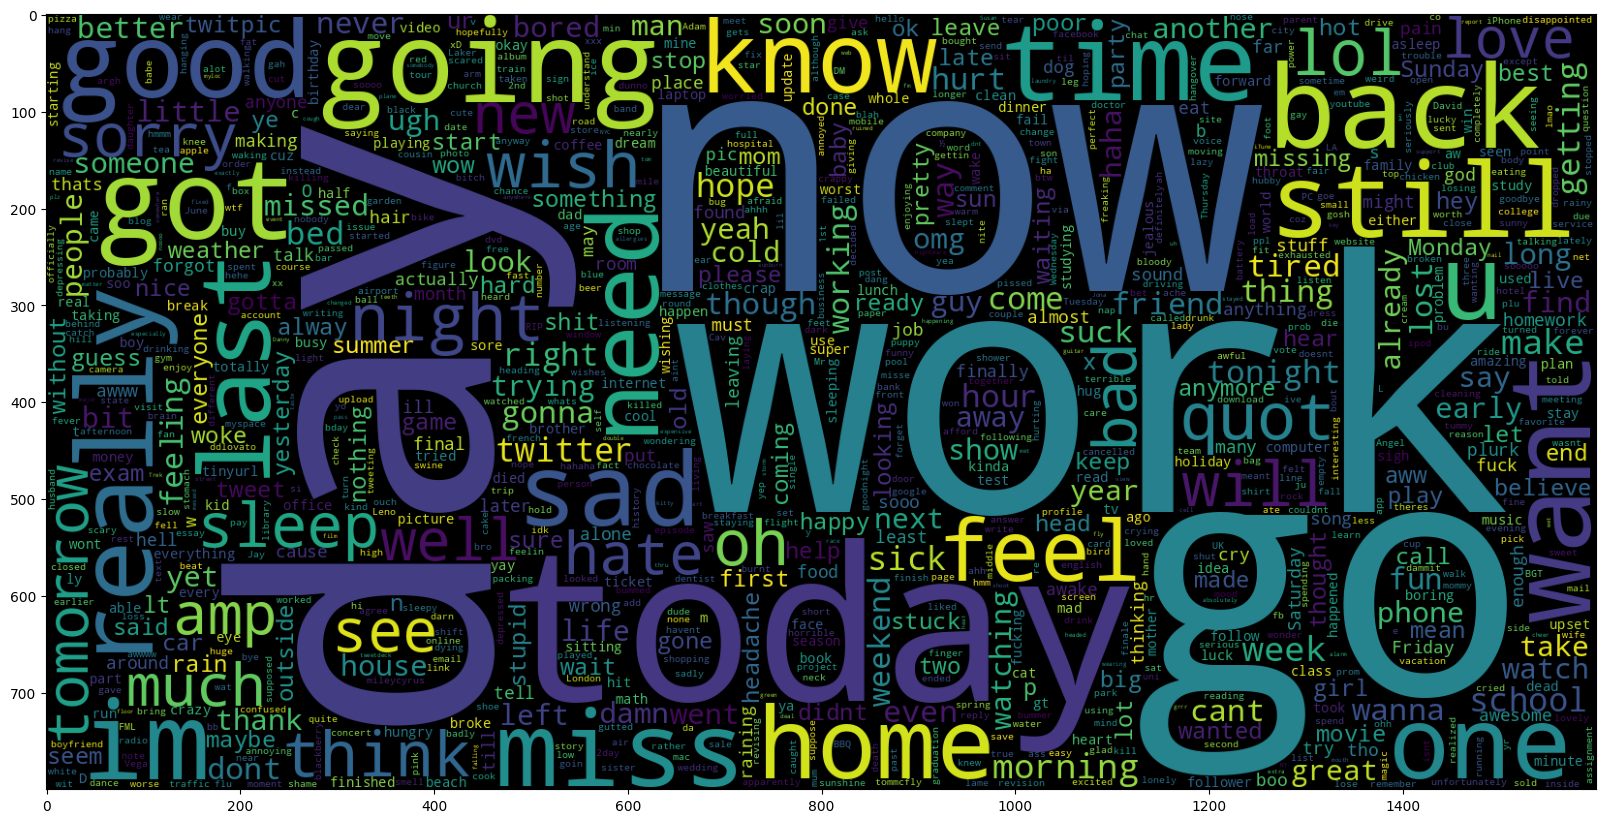

In [62]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame
# ... (Your previous code to load and preprocess 'data') ...

# Before generating the WordCloud, ensure all elements in 'data_neg' are strings
data_neg = data['text'][:800000].astype(str)  # Convert elements to strings

plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.show()  # Add plt.show() to display the plot

In [63]:
data_pos = data['text'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [64]:
# Assuming 'data' has fewer rows than 800000
data_pos = data['text'][0:]  # Taking all elements from 'text' column or adjust based on actual rows

# Alternative: you could calculate the midpoint dynamically
# data_pos = data['text'][int(len(data)/2):]

wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos.astype(str))) # Applying astype(str) here as it may raise a TypeError: sequence item 0: expected str instance, Series found error  if we dont do

In [65]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [66]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=50000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  50000


In [67]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [68]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [71]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=26105111, stratify=y)

In [80]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [84]:
!pip install imblearn

In [113]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Example: Mock data creation (replace this with your actual data loading)
# Assuming 'data' is a DataFrame with features and target.
# Replace this with your actual dataset.
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [5, 4, 3, 2, 1],
    'target': [0, 1, 0, 1, 0]
})

# Split into features (X) and target (y)
X = data.drop(columns=['target'])  # Features
y = data['target']  # Target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure X_train and X_test are DataFrames (not Series)
if isinstance(X_train, pd.Series):
    X_train = X_train.to_frame()
if isinstance(X_test, pd.Series):
    X_test = X_test.to_frame()

# Ensure inputs are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Handle missing values if any
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
LRmodel = LogisticRegression(C=2, max_iter=1000, n_jobs=-1)
LRmodel.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = LRmodel.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# Output results
print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1174: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


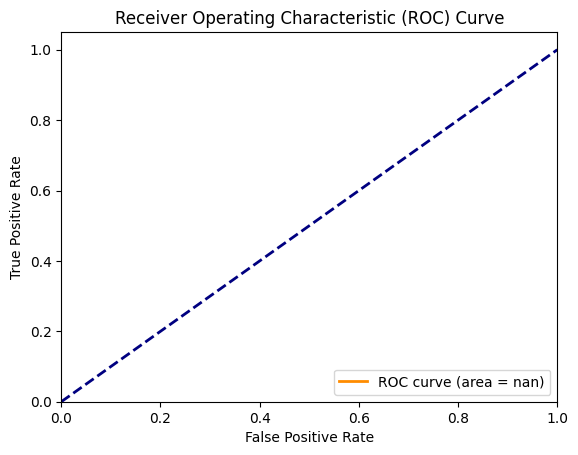

In [115]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Ensure y_test and predicted probabilities are defined
# Logistic regression provides probabilities with the `predict_proba` method.
# Use [:, 1] to extract the probabilities for the positive class.
y_pred_prob = LRmodel.predict_proba(X_test_scaled)[:, 1]  # Predicted probabilities

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


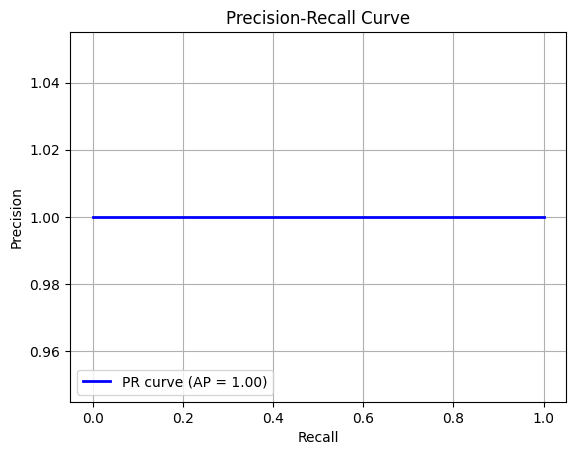

In [116]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision-recall metrics
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
avg_precision = average_precision_score(y_test, y_pred_prob)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='PR curve (AP = %0.2f)' % avg_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid()
plt.show()


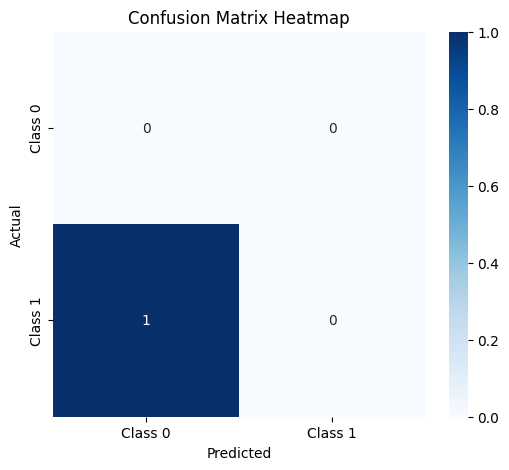

In [117]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate predictions for the test set
y_pred = LRmodel.predict(X_test_scaled)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


<ipython-input-118-8eac0fa3a23c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='viridis')


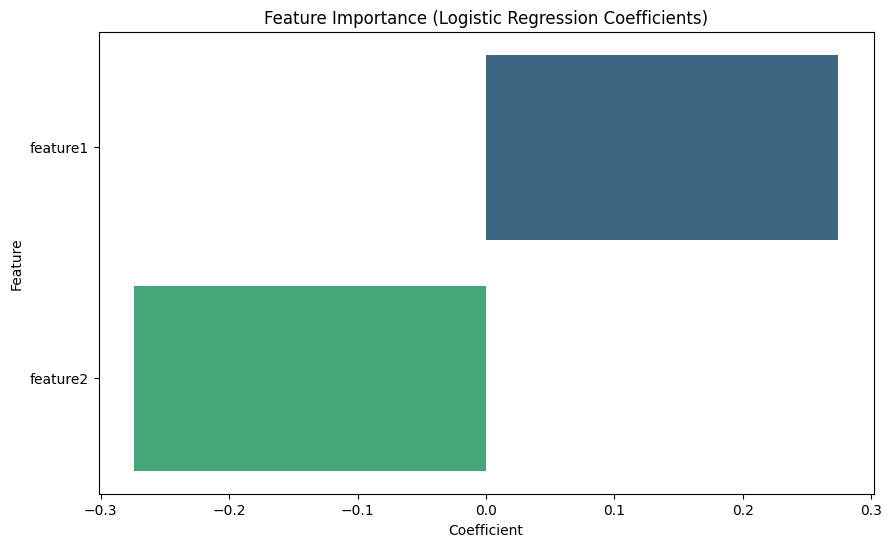

In [118]:
import pandas as pd
import numpy as np

# Assuming your feature names are in `feature_names`
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]

# Get feature coefficients
coefficients = LRmodel.coef_[0]

# Create a DataFrame for better visualization
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance['Absolute Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()


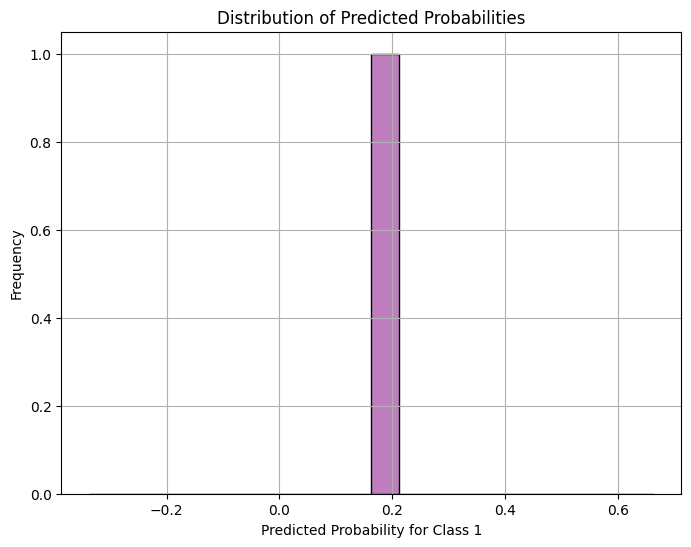

In [119]:
# Plot distribution of predicted probabilities
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_prob, bins=20, kde=True, color='purple')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability for Class 1')
plt.ylabel('Frequency')
plt.grid()
plt.show()


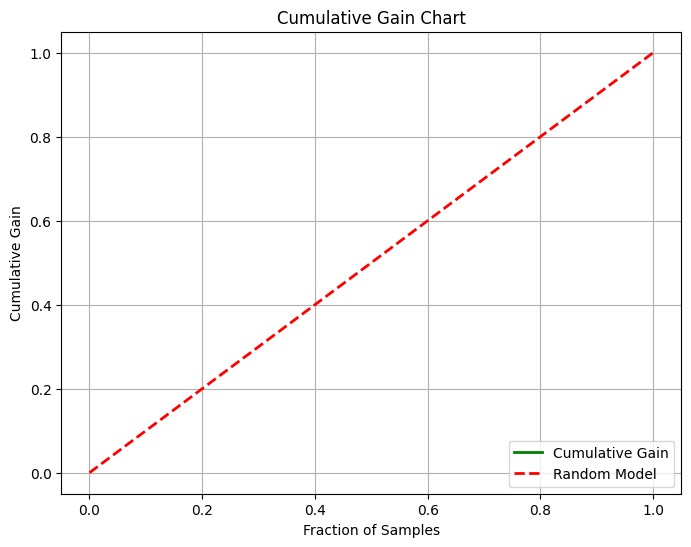

In [121]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure y_test and y_pred_prob are numpy arrays
y_test = np.array(y_test)
y_pred_prob = np.array(y_pred_prob)

# Sort predictions and true labels based on predicted probabilities
sorted_indices = np.argsort(y_pred_prob)[::-1]  # Sort in descending order
sorted_y_test = y_test[sorted_indices]

# Calculate cumulative gain
cumulative_gain = np.cumsum(sorted_y_test) / np.sum(sorted_y_test)  # Normalized cumulative sum

# Calculate fraction of samples
fraction_of_samples = np.arange(1, len(cumulative_gain) + 1) / len(cumulative_gain)

# Plot Cumulative Gain Chart
plt.figure(figsize=(8, 6))
plt.plot(fraction_of_samples, cumulative_gain, color='green', lw=2, label='Cumulative Gain')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Model')  # Random baseline
plt.xlabel('Fraction of Samples')
plt.ylabel('Cumulative Gain')
plt.title('Cumulative Gain Chart')
plt.legend(loc='lower right')
plt.grid()
plt.show()
